In [59]:
#Proyecto 
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import warnings
import seaborn
seaborn.set()

warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
top_books=pd.read_csv('book_data.csv')
top_books.isnull().sum()
top_books.sort_values(by=['book_rating_count','book_rating', 'book_review_count'], ascending=False, inplace=True)

#top_books

In [65]:
#tomemos una muestra representativa de 500 libros ya ordenados 
top_500=top_books[0:700]
top_500

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_name,image_url
50,J.K. Rowling|Mary GrandPré,Harry Potter's life is miserable. His parents ...,NaN,Hardcover,9780439554930.0,320 pages,4.46,5588580,88816,Harry Potter and the Sorcerer's Stone,Fantasy|Young Adult|Fiction,3.jpg,https://images.gr-assets.com/books/1474154022l...
44271,Suzanne Collins,\r\r\nGanar significa fama y fortuna. Perder s...,NaN,Paperback,9788498675399,396 pages,4.33,5523413,160776,Los juegos del hambre,Young Adult|Fiction|Science Fiction|Dystopia|F...,6596839.jpg,https://images.gr-assets.com/books/1335891621l...
28154,Suzanne Collins|Ina Jakaitė,LAIMĖJIMAS ATNEŠ ŠLOVĘ IR TURTĄ.PRALAIMĖJIMAS ...,NaN,Hardcover,NaN,352 pages,4.33,5522714,160768,Bado žaidynės,Young Adult|Fiction|Science Fiction|Dystopia|F...,11143580.jpg,https://images.gr-assets.com/books/1303117363l...
25990,Suzanne Collins|Sevinç Tezcan Yanar,"Etkileyici bir fantastik dünya, bitmek bilmeye...",NaN,Paperback,9786055943639,384 pages,4.33,5522513,160762,Açlık Oyunları,Young Adult|Fiction|Science Fiction|Dystopia|F...,8409352.jpg,https://images.gr-assets.com/books/1275904617l...
21895,Suzanne Collins|Fabio Paracchini|Simona Brogli,"Quando Katniss urla ""Mi offro volontaria, mi o...",Chrysalide,Hardcover,9788804621614,369 pages,4.33,5522483,160762,Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,13562614.jpg,https://images.gr-assets.com/books/1335446608l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31248,Diana Gabaldon,"L’anno è il 1945. Claire Randall, un’infermier...",NaN,Hardcover,9788863809466,836 pages,4.22,668966,40197,Outlander: La straniera,Historical|Historical Fiction|Romance|Fantasy|...,24940151.jpg,https://images.gr-assets.com/books/1424006540l...
31169,Diana Gabaldon,Claire Randall is leading a double life. She h...,First Edition,Hardcover,9780385302302,627 pages,4.22,668964,40197,Outlander,Historical|Historical Fiction|Romance|Fantasy|...,864699.jpg,https://images.gr-assets.com/books/1470812314l...
28272,Diana Gabaldon,#1 NEW YORK TIMES BESTSELLER • NOW A STARZ ORI...,20th Anniversary Collector's Edition,Hardcover,9780440423201,688 pages,4.22,668942,40197,Outlander,Historical|Historical Fiction|Romance|Fantasy|...,9572776.jpg,https://images.gr-assets.com/books/1320562912l...
22145,Diana Gabaldon|Carmen Bordeu,"Recién acabada la Segunda Guerra Mundial, una ...",Letras de Bolsillo,Kindle Edition,NaN,768 pages,4.22,668892,40197,Forastera,Historical|Historical Fiction|Romance|Fantasy|...,35724244.jpg,https://images.gr-assets.com/books/1500683049l...


In [223]:
# se deben clasificar en genéros, aunque los usuarios lo clasifican en diferentes generos podemos clasificarlo con la clasificación que tiene mayores usuarios

top_500['Nueva_Clasificación']=top_500.genres.apply(lambda x: ''.join(re.findall(r'^\w+',x.replace(" ", "")))) 
top_500.head(20)


,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_name,image_url,Nueva_Clasificación,score_afinn
50,J.K. Rowling|Mary GrandPré,Harry Potter's life is miserable. His parents ...,NaN,Hardcover,9780439554930.0,320,4.46,5588580,88816,Harry Potter and the Sorcerer's Stone,Fantasy|Young Adult|Fiction,3.jpg,https://images.gr-assets.com/books/1474154022l...,Fantasy,-5.0
44271,Suzanne Collins,\r\r\nGanar significa fama y fortuna. Perder s...,NaN,Paperback,9788498675399,396,4.33,5523413,160776,Los juegos del hambre,Young Adult|Fiction|Science Fiction|Dystopia|F...,6596839.jpg,https://images.gr-assets.com/books/1335891621l...,YoungAdult,1.0
28154,Suzanne Collins|Ina Jakaitė,LAIMĖJIMAS ATNEŠ ŠLOVĘ IR TURTĄ.PRALAIMĖJIMAS ...,NaN,Hardcover,NaN,352,4.33,5522714,160768,Bado žaidynės,Young Adult|Fiction|Science Fiction|Dystopia|F...,11143580.jpg,https://images.gr-assets.com/books/1303117363l...,YoungAdult,0.0
25990,Suzanne Collins|Sevinç Tezcan Yanar,"Etkileyici bir fantastik dünya, bitmek bilmeye...",NaN,Paperback,9786055943639,384,4.33,5522513,160762,Açlık Oyunları,Young Adult|Fiction|Science Fiction|Dystopia|F...,8409352.jpg,https://images.gr-assets.com/books/1275904617l...,YoungAdult,0.0
21895,Suzanne Collins|Fabio Paracchini|Simona Brogli,"Quando Katniss urla ""Mi offro volontaria, mi o...",Chrysalide,Hardcover,9788804621614,369,4.33,5522483,160762,Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,13562614.jpg,https://images.gr-assets.com/books/1335446608l...,YoungAdult,6.0
21678,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Paperback,9780439023528,374,4.33,5522458,160762,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,7285601.jpg,https://images.gr-assets.com/books/1327962782l...,YoungAdult,-5.0
22255,Suzanne Collins,Sometime in the future after the destruction o...,NaN,Paperback,NaN,436,4.33,5522232,160760,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,12091570.jpg,https://images.gr-assets.com/books/1311332303l...,YoungAdult,-9.0
21726,Suzanne Collins|Maria Postema,Katniss Everdeen woont in het 12e en armste di...,NaN,Paperback,9789047515975,339,4.33,5522182,160760,De Hongerspelen,Young Adult|Fiction|Science Fiction|Dystopia|F...,10857048.jpg,https://images.gr-assets.com/books/1300957619l...,YoungAdult,-3.0
14936,Suzanne Collins,Winning will make you famous.Losing means cert...,NaN,Paperback,9781407132082,454,4.33,5521568,160750,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,12885649.jpg,https://images.gr-assets.com/books/1327089453l...,YoungAdult,-6.0
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9780439023481.0,374,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,2767052.jpg,https://images.gr-assets.com/books/1447303603l...,YoungAdult,-5.0


Text(0.5, 1.0, '% Libros por categoría en Top 700')

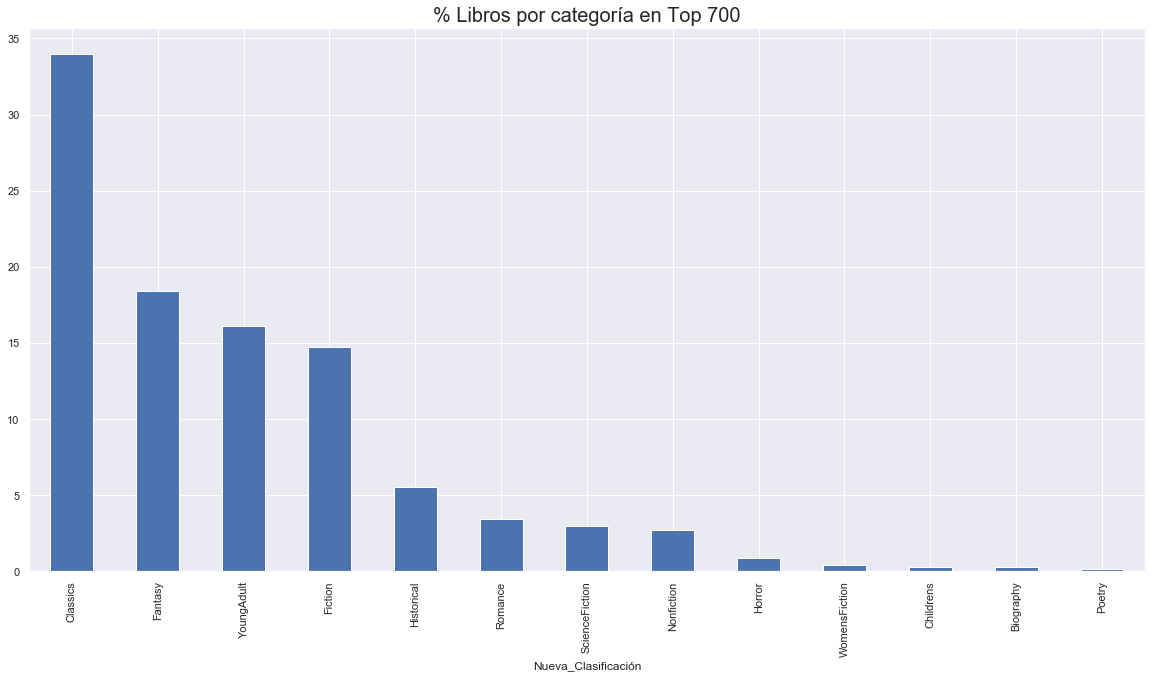

In [216]:
#Sacando porcentaje. Si 100x=500 
porcentaje=((top_500.groupby('Nueva_Clasificación').genres.count())*100)/700

porcentaje.sort_values(ascending=False).plot.bar()
plt.title('% Libros por categoría en Top 700',fontsize = 20)

Text(0.5, 1, 'Distribución por categoría')

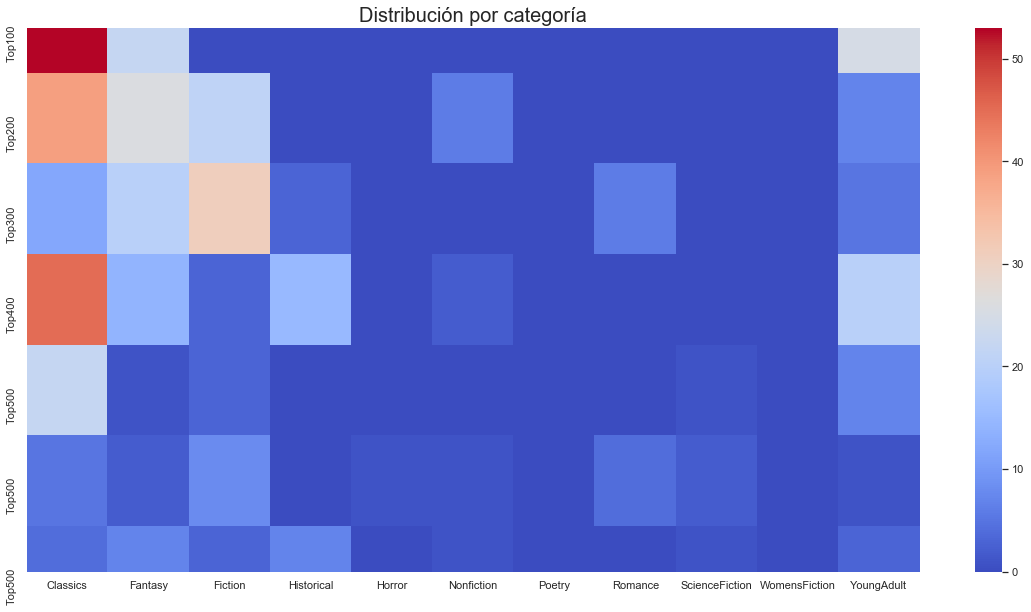

In [217]:
distribution_tops=pd.concat([top_500[0:100].groupby('Nueva_Clasificación').genres.count(),top_500[101:200].groupby('Nueva_Clasificación').book_title.count(),
               top_500[201:300].groupby('Nueva_Clasificación').book_isbn.count(),top_500[301:400].groupby('Nueva_Clasificación').book_format.count(),
               top_500[401:500].groupby('Nueva_Clasificación').book_edition.count(),top_500[501:600].groupby('Nueva_Clasificación').book_edition.count(),
               top_500[601:700].groupby('Nueva_Clasificación').book_edition.count()],
               axis=1)
distribution_tops=distribution_tops.rename(columns={"genres": "Top100", "book_title": "Top200","book_isbn": "Top300","book_format": "Top400","book_edition": "Top500"})
distribution_tops=distribution_tops.fillna(0).transpose()
distribution_tops.drop(columns=['Biography','Childrens'],inplace=True)
midpoint = (distribution_tops.values.max() - distribution_tops.values.min()) / 2
seaborn.heatmap(test,cmap='coolwarm',center=midpoint)
plt.title('Distribución por categoría',fontsize = 20)

Text(0.5, 1, 'Score vs Número de páginas')

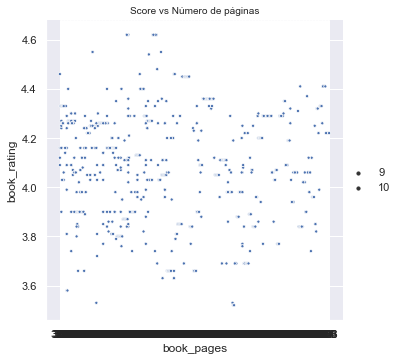

In [219]:
#Score vs Number Pages
top_500.book_pages.fillna(0)
top_500['book_pages']=top_500.book_pages.apply(lambda x: (re.sub('\D','',str(x))))


seaborn.set(rc={'figure.figsize':(20,10)}, style ="darkgrid")
seaborn.relplot(y='book_rating', x='book_pages',size=10,data=top_500,sizes=(10, 100))
plt.title('Score vs Número de páginas',fontsize = 10)

Text(0.5, 1, 'Número de Reviews vs de Top N')

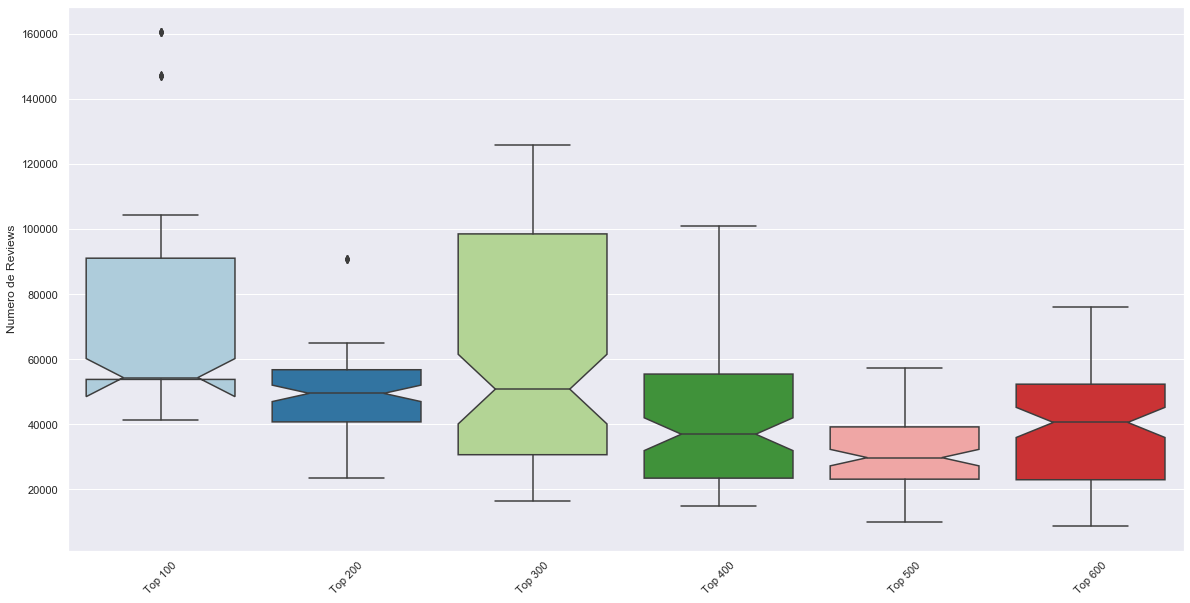

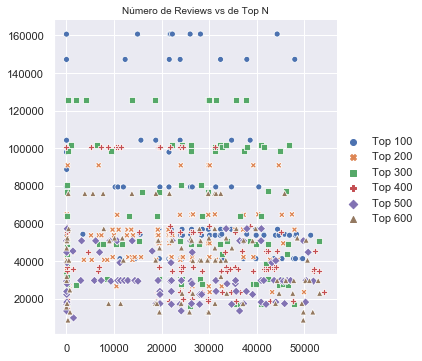

In [221]:
#Number of reviews vs is a indicator in the top?
    
reviews_distribution=pd.concat([top_500.book_review_count[0:100],top_500.book_review_count[101:200],top_500.book_review_count[201:300],top_500.book_review_count[301:400],
                                top_500.book_review_count[401:500],top_500.book_review_count[501:600]],axis=1)
reviews_distribution.columns=['Top 100','Top 200','Top 300','Top 400','Top 500','Top 600']
reviews_distribution.fillna(0)

p = seaborn.boxplot(data=reviews_distribution,
                palette = 'Paired',
                notch=True)
plt.xticks(rotation=45)
l = plt.xlabel('')
plt.ylabel('Numero de Reviews')
#plt.title('Número de Reviews vs de Top N',fontsize = 10)
#plt.text(5.4,200, "Box Plot", fontsize = 40, color="black", fontstyle='italic')

seaborn.relplot(data=reviews_distribution)
plt.title('Número de Reviews vs de Top N',fontsize = 10)


Text(0.5, 1, 'Book Rating GoodReads vs Score Afinn')

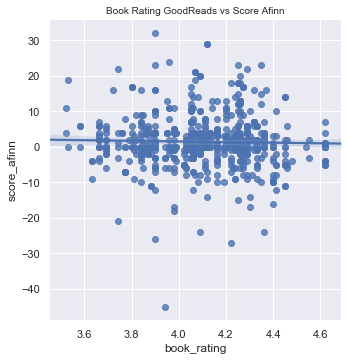

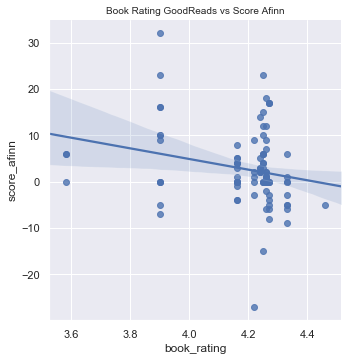

In [222]:
with open("AFINN-111.txt") as f1:
    words = {}
    for line in f1:
        word, score = line.split('\t')
        words[word] = float(score)
top_500['score_afinn']=top_500.book_desc.apply(lambda line: sum(words.get(word, 0) for word in line.split()))
seaborn.lmplot(x="book_rating", y="score_afinn", data=top_500)
plt.title('Book Rating GoodReads vs Score Afinn',fontsize = 10)
seaborn.lmplot(x="book_rating", y="score_afinn", data=top_500[0:100])
plt.title('Book Rating GoodReads vs Score Afinn',fontsize = 10)

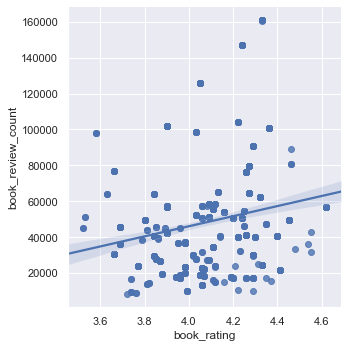

In [207]:
#number of reviews per Star
#groupbyrangos y media de los reviews que se hicieron en ese rango 
top_500_perStar=top_500[['book_review_count','book_rating']]
top_500_perStar
top_500_perStar=top_500_perStar.groupby(pd.cut(top_500_perStar["book_rating"], np.arange(3.5, 4, 0.05))).sum()
#normalizando
list_normalize=[3.55,3.6,3.65,3.7,3.75,3.8,3.85,3.9,3.95]
top_500_perStar
seaborn.lmplot(x="book_rating", y="book_review_count", data=top_500)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DE0B33408>,
      dtype=object)

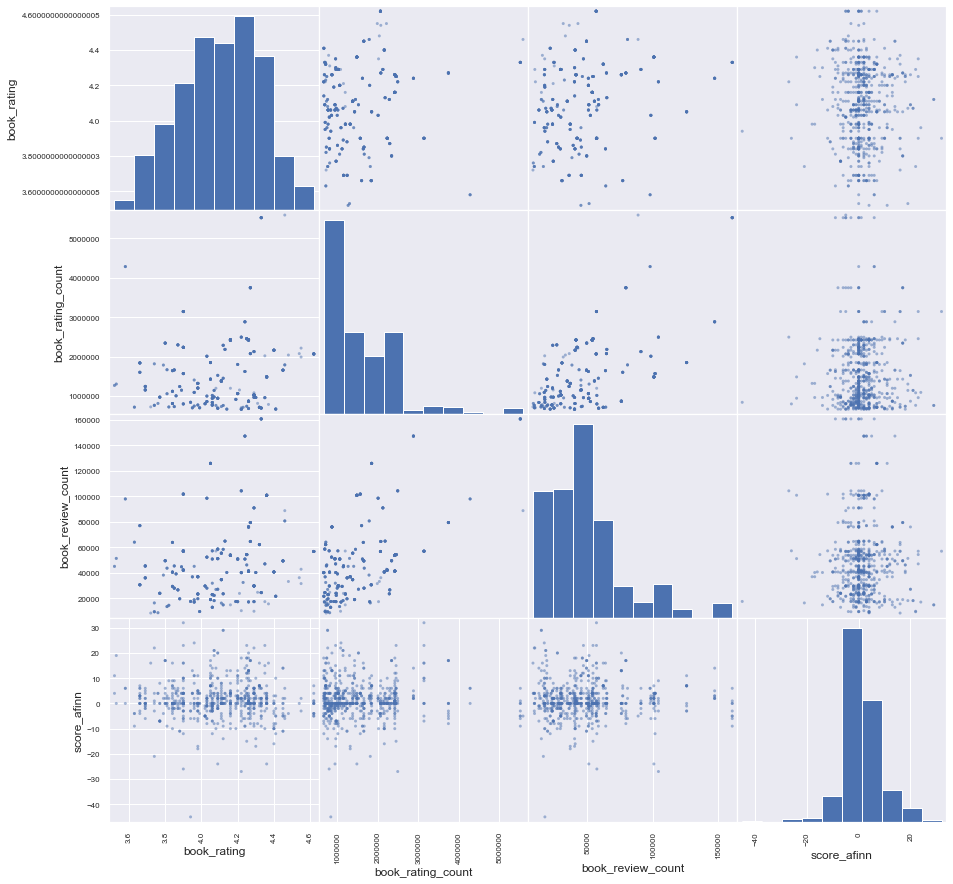

In [224]:
pd.plotting.scatter_matrix(top_500, figsize=(15,15))